In [1]:
import working_with_fits as wwf
import working_with_crtf as crtf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import profiles as prof
from scipy.optimize import curve_fit
from astropy.wcs import WCS
from astropy.wcs import utils
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, FK5
from scipy.signal import argrelextrema

# Lets prepare input for slicing in CASA

In [2]:
#fits to work with
directory = '../SVS13/espirales/'
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [3]:
crtf.pixels_to_list(directory+'pixels_S1_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S1_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_duda_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S2_duda_end.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_duda_ini.crtf', hdr)
crtf.pixels_to_list(directory+'pixels_S3_duda_end.crtf', hdr)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


# Working with profiles

In [2]:
coordA = '03h29m03.7456s +31d16m03.773s'
coordB = '03h29m03.7686s +31d16m03.773s'
posA= SkyCoord(coordA, frame=FK5)
posB= SkyCoord(coordB, frame=FK5)

## S1

In [3]:
directory = '../SVS13/espirales/'
file_base = directory+'profiles/profiles_S1'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,22)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

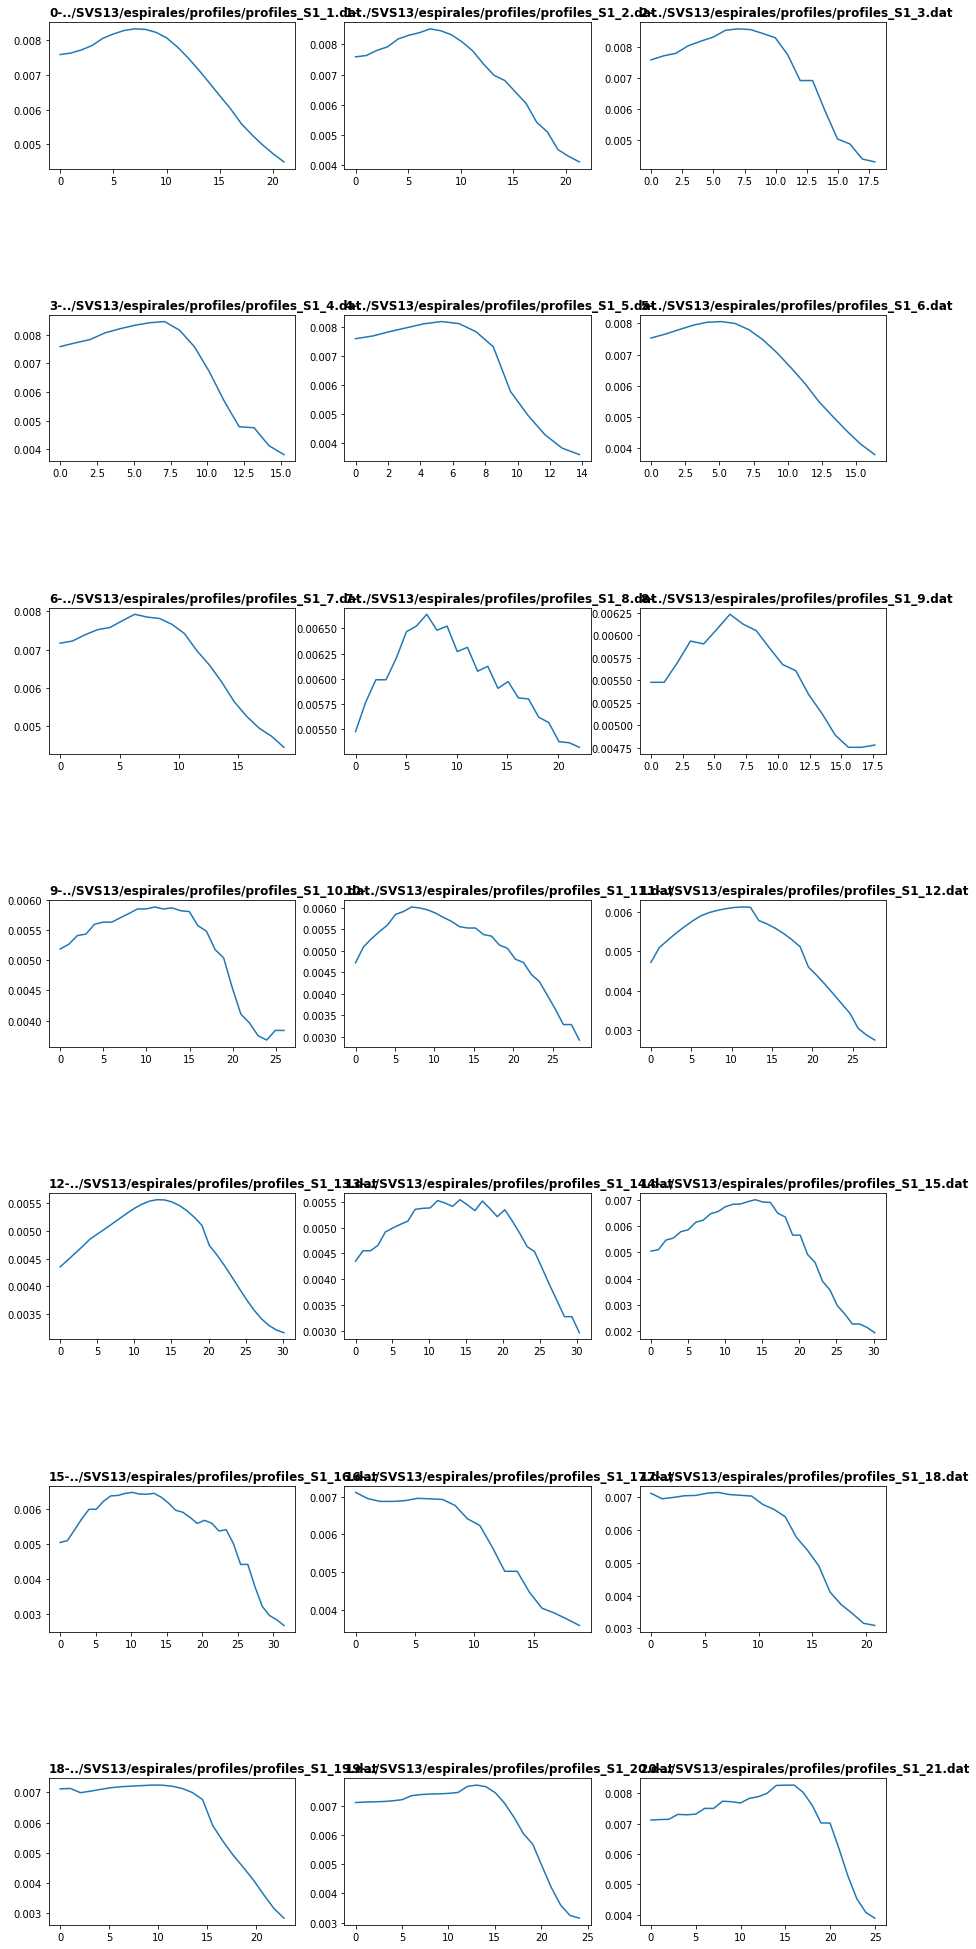

In [4]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

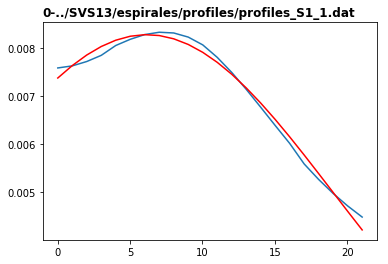

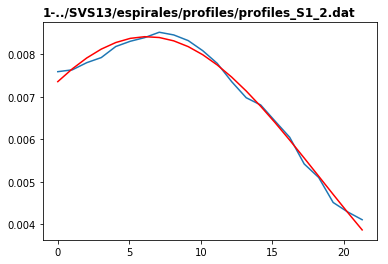

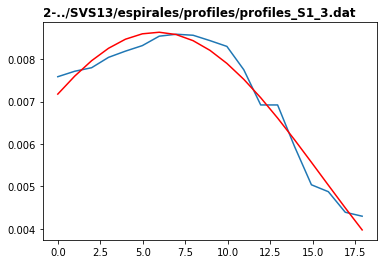

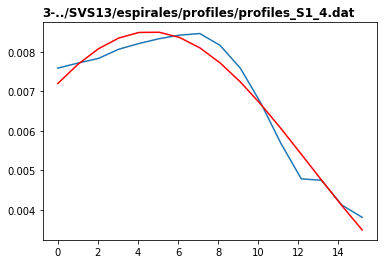

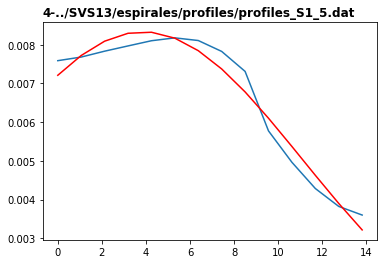

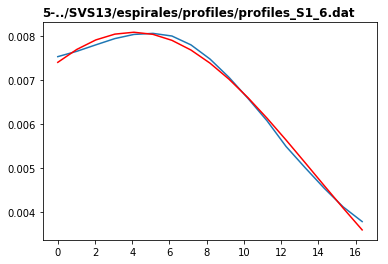

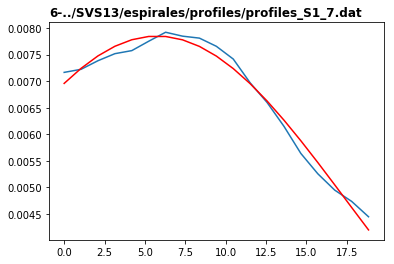

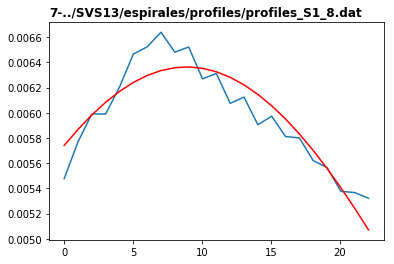

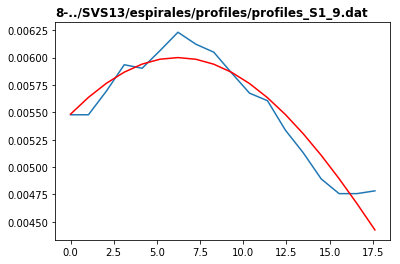

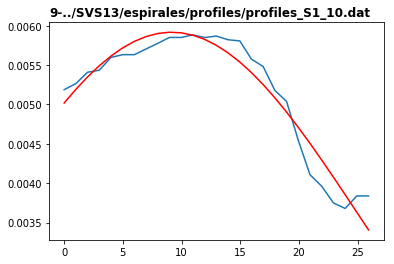

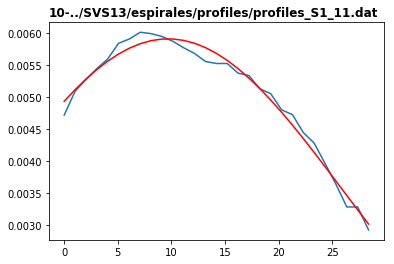

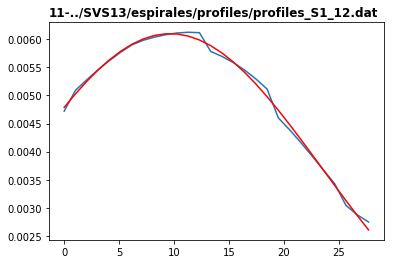

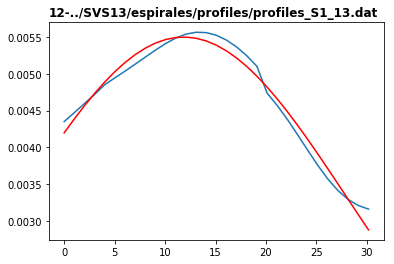

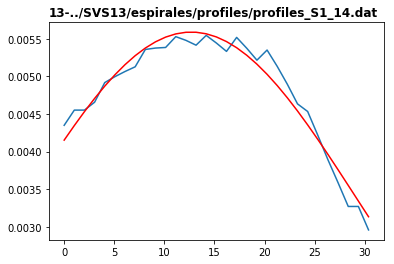

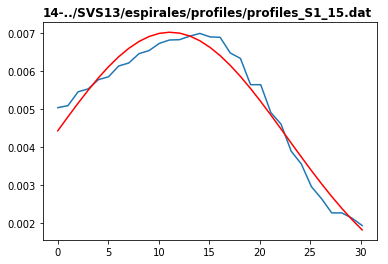

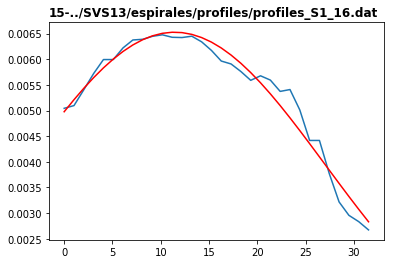

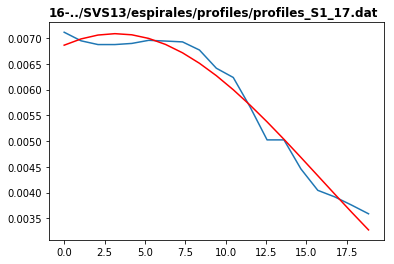

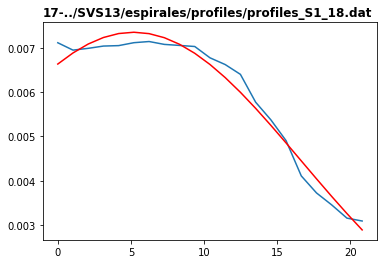

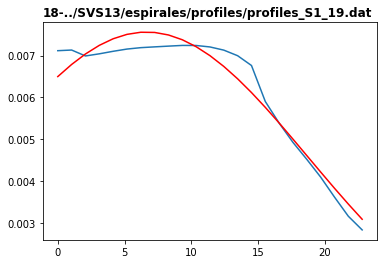

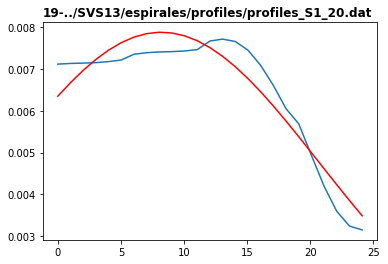

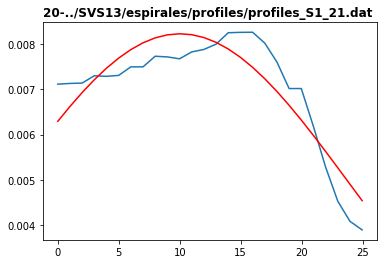

In [5]:
# gaussian fits
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [6]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [7]:
orig_file = directory+'pixels_S1_ini.dat'
end_file = directory+'pixels_S1_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [8]:
outname = 'S1_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [12]:
#save points
cel_size = 0.012 #arcsec, this info is the profiles files
err = [i[0]*cel_size for i in widths]

ang = [posA.position_angle(i).degree for i in c]
r = [posA.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistA-S1.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

#save points
ang = [posB.position_angle(i).degree for i in c]
r = [posB.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistB-S1.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

## S2

In [13]:
directory = '../SVS13/espirales/'
file_base = directory+'/profiles/profiles_S2'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,20)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

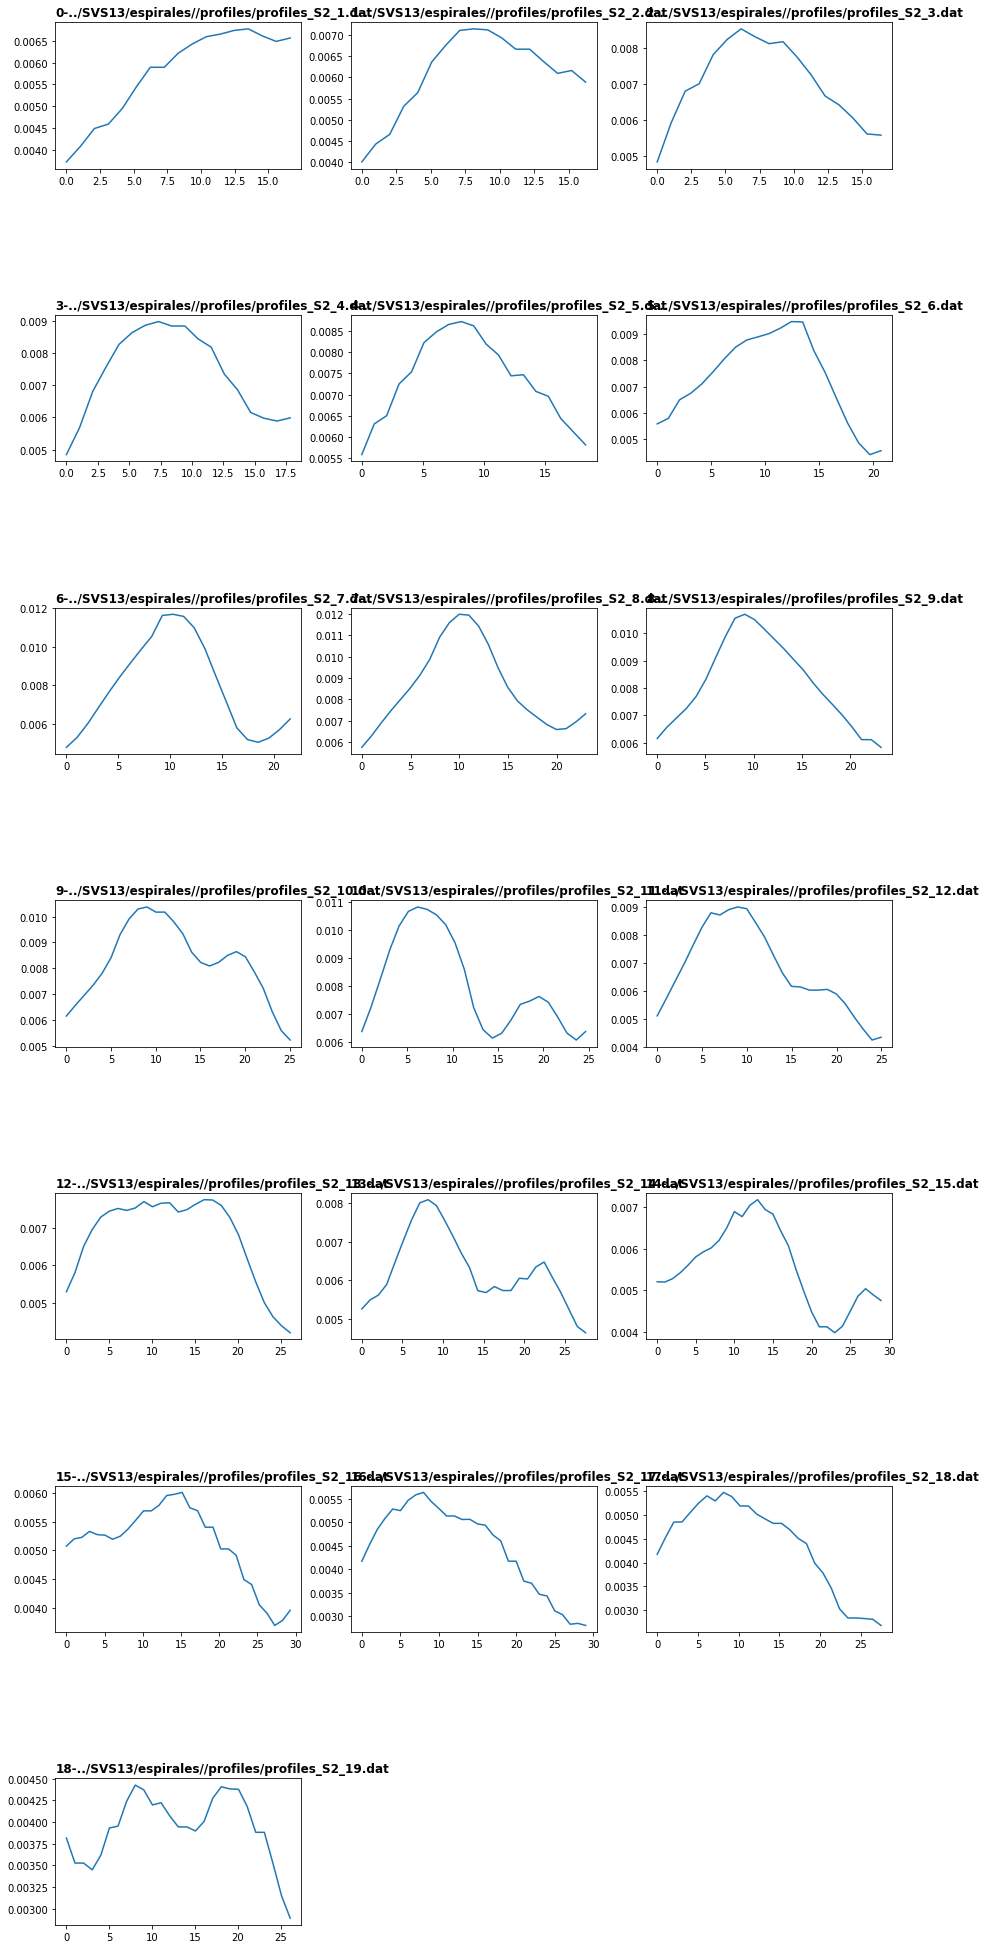

In [14]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

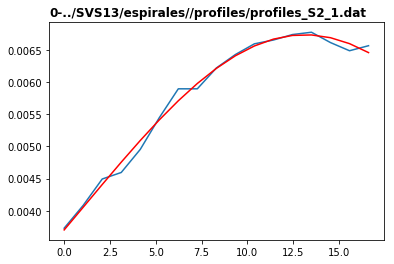

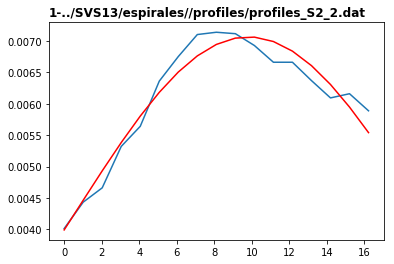

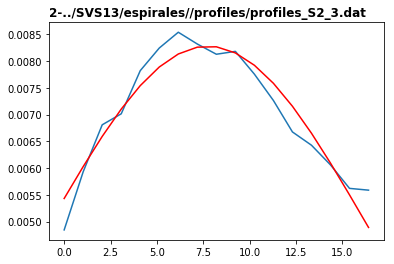

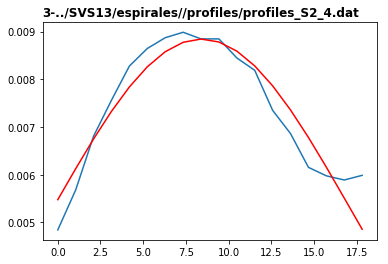

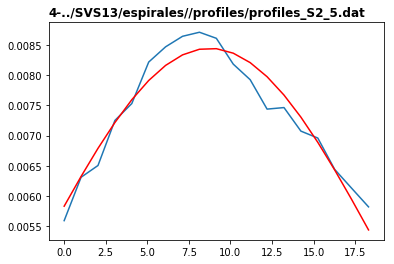

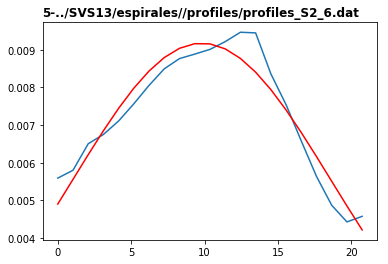

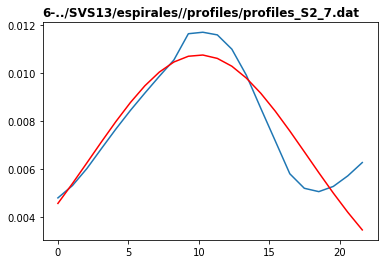

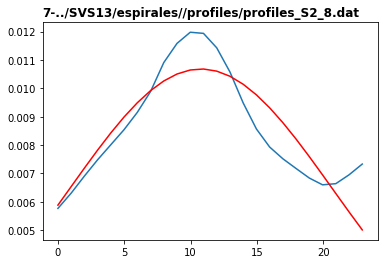

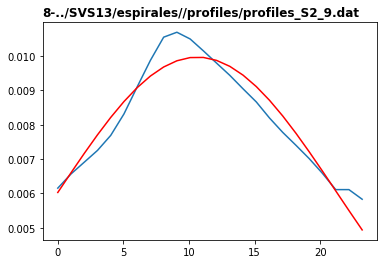

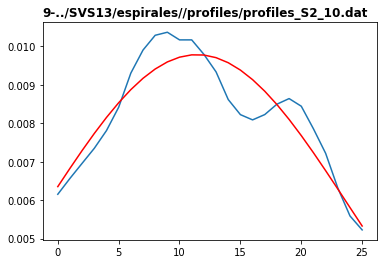

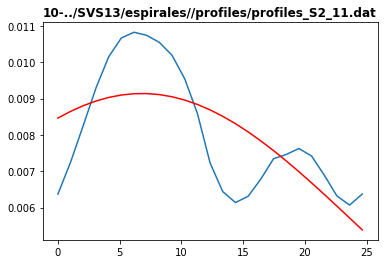

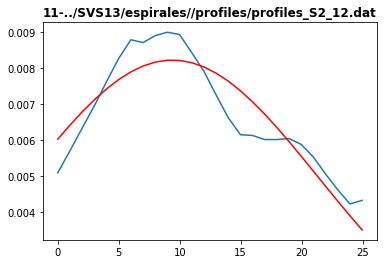

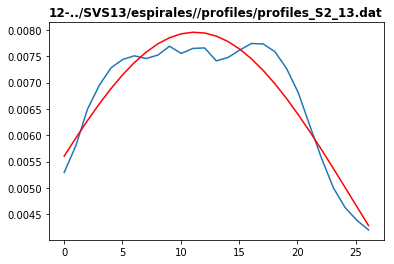

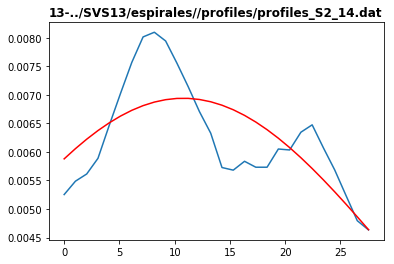

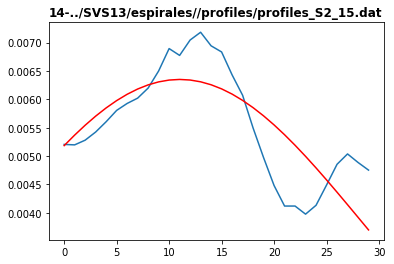

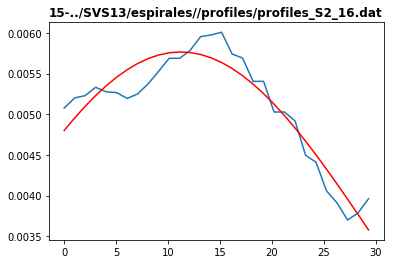

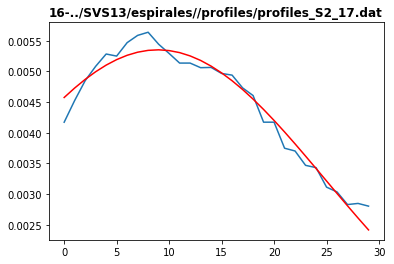

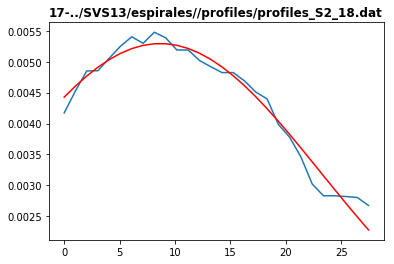

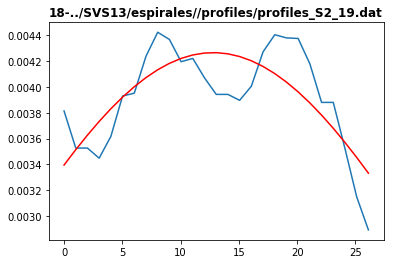

In [15]:
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [16]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [17]:
orig_file = directory+'pixels_S2_ini.dat'
end_file = directory+'pixels_S2_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [18]:
outname = 'S2_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
#crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [19]:
#save points
cel_size = 0.012 #arcsec, this info is the profiles files
err = [i[0]*cel_size for i in widths]

ang = [posA.position_angle(i).degree for i in c]
r = [posA.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistA-S2.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

#save points
ang = [posB.position_angle(i).degree for i in c]
r = [posB.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistB-S2.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

## S2-duda

In [20]:
directory = '../SVS13/espirales/'
file_base = directory+'profiles/profiles_S2-duda'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,11)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

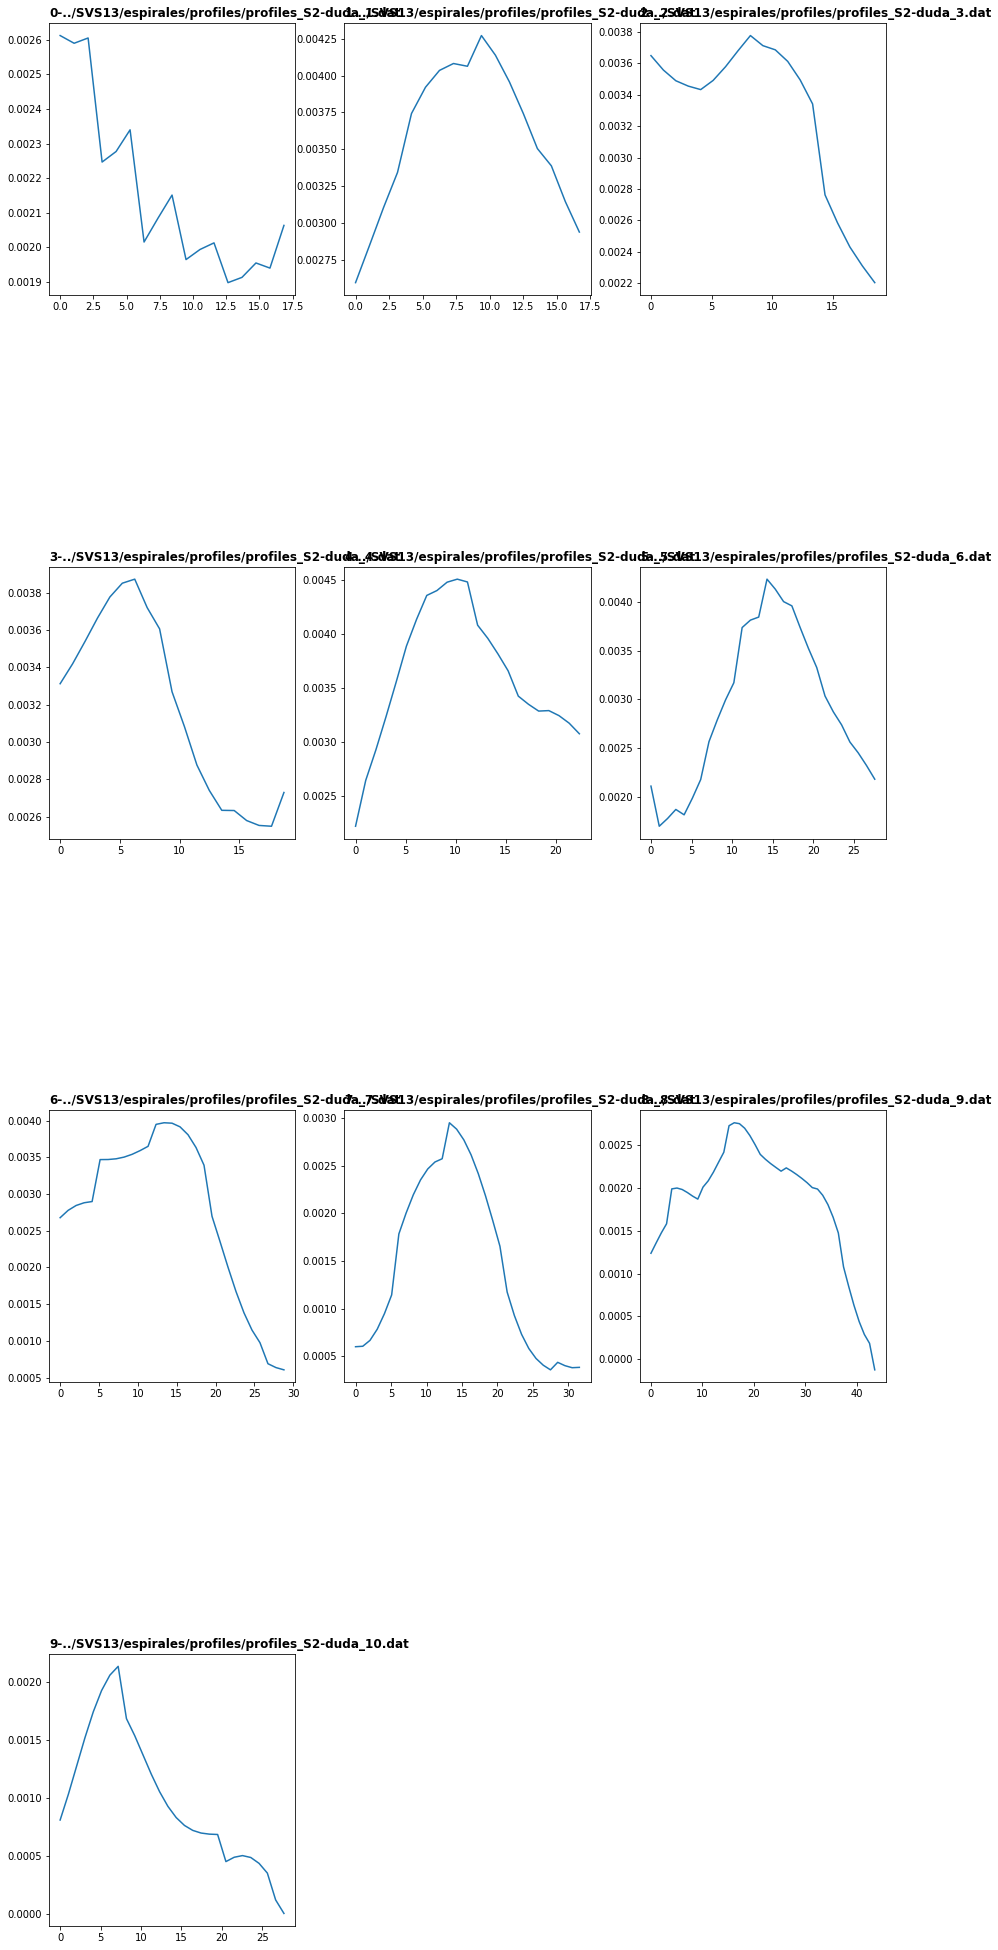

In [21]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

In [22]:
value.pop(0)
dist.pop(0)
file_name.pop(0)

'../SVS13/espirales/profiles/profiles_S2-duda_1.dat'

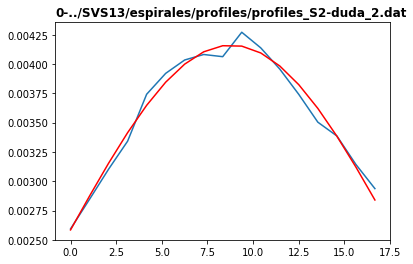

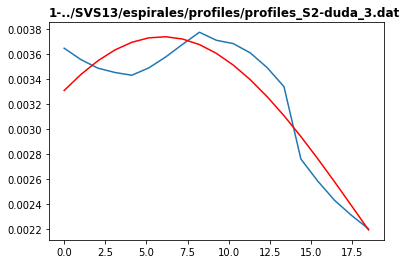

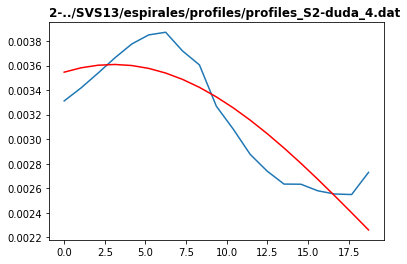

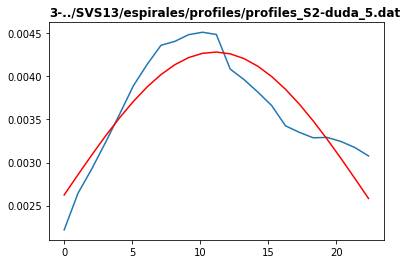

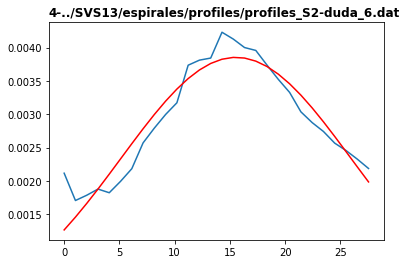

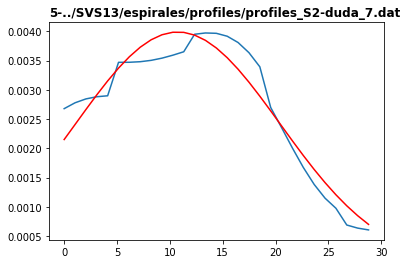

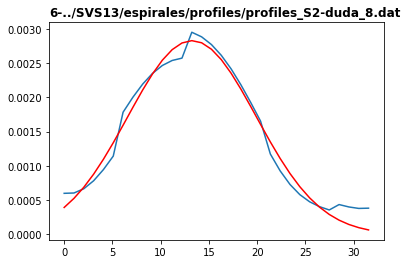

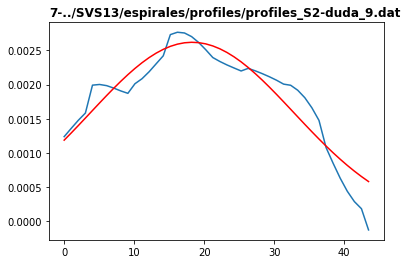

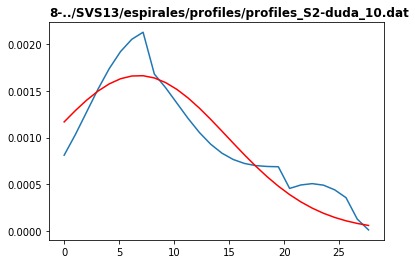

In [23]:
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [24]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [25]:
orig_file = directory+'pixels_S2_duda_ini.dat'
end_file = directory+'pixels_S2_duda_end.dat'
inis = np.loadtxt(orig_file)[1:]
ends = np.loadtxt(end_file)[1:]

In [26]:
outname = 'S2_axis_duda' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [27]:
#save points
cel_size = 0.012 #arcsec, this info is the profiles files
err = [i[0]*cel_size for i in widths]

ang = [posA.position_angle(i).degree for i in c]
r = [posA.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistA-S2-duda.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

#save points
ang = [posB.position_angle(i).degree for i in c]
r = [posB.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistB-S2-duda.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

##  S3

In [3]:
directory = '../SVS13/espirales/'
file_base = directory+'/profiles/profiles_S3'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,44)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

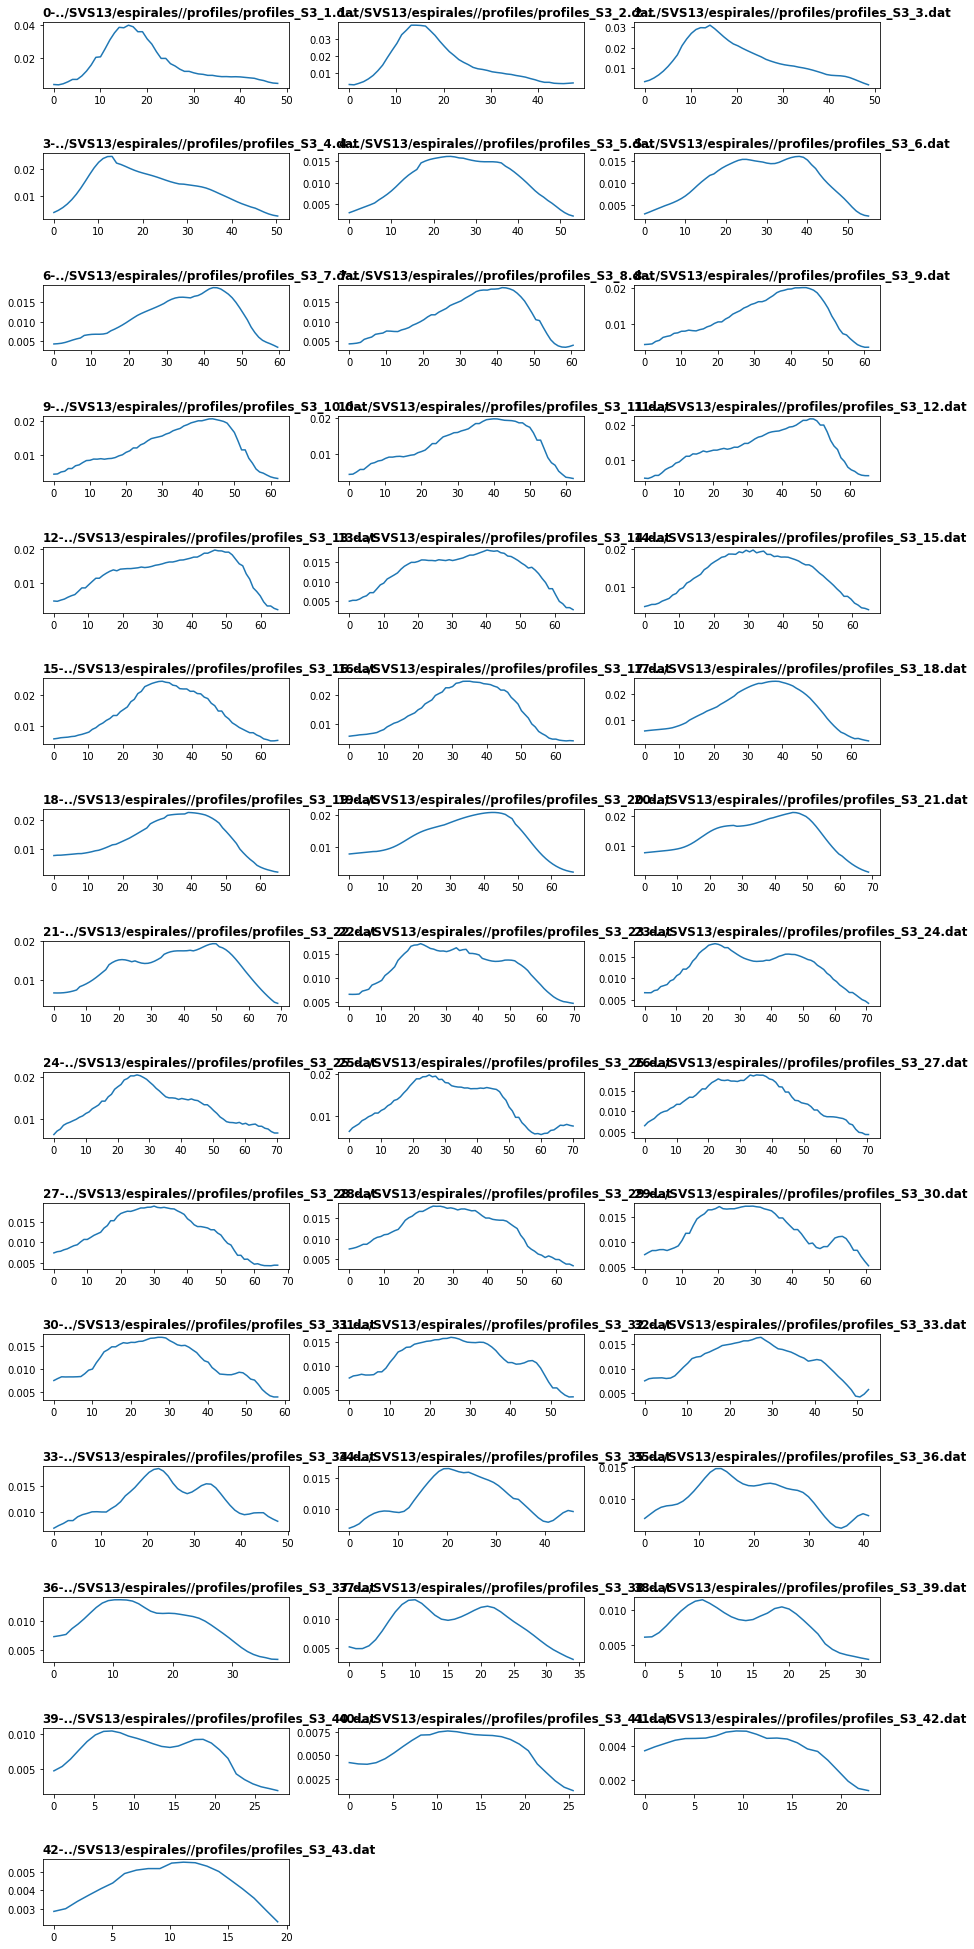

In [4]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

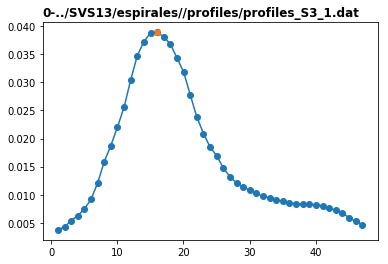

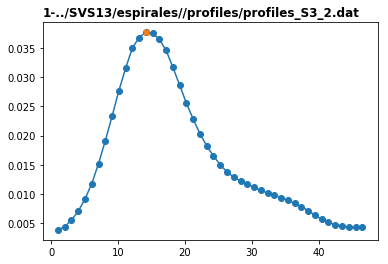

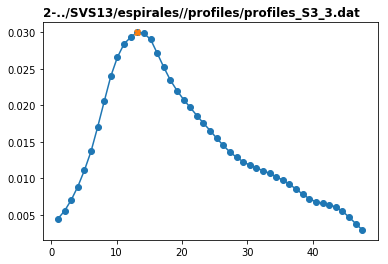

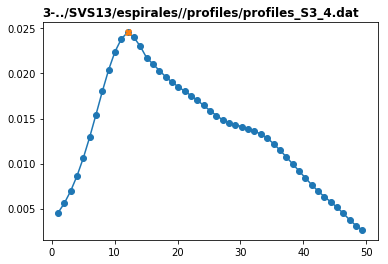

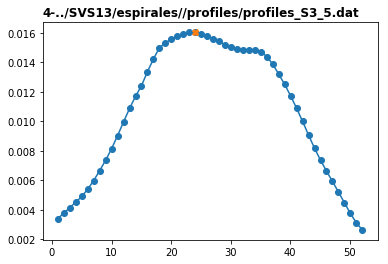

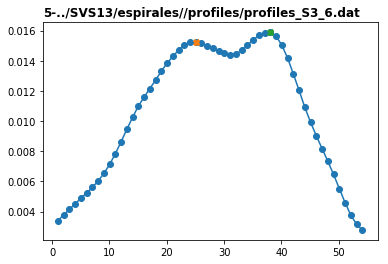

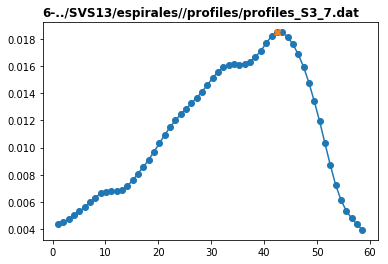

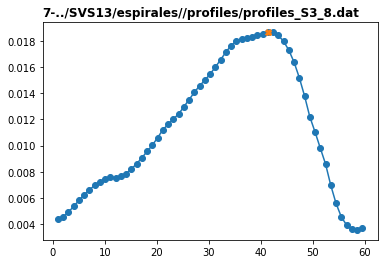

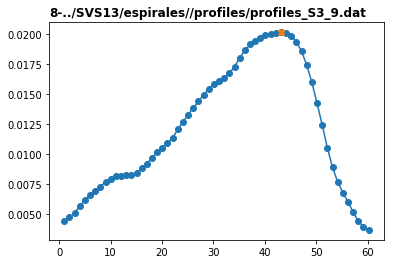

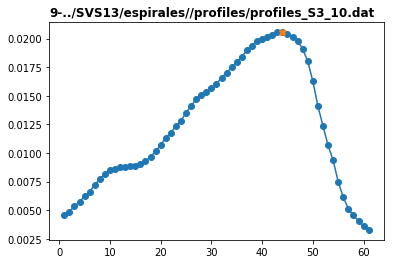

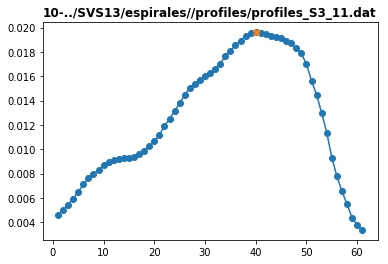

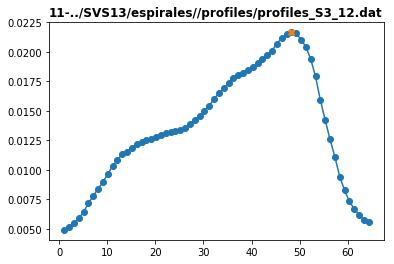

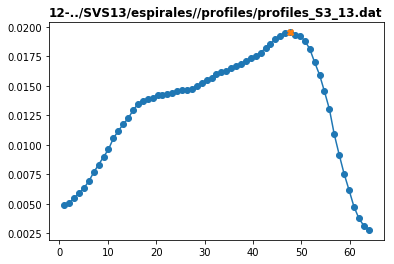

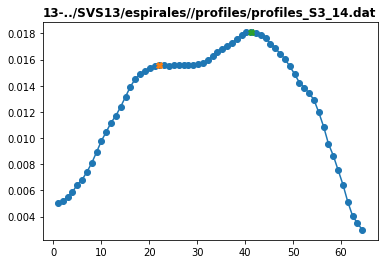

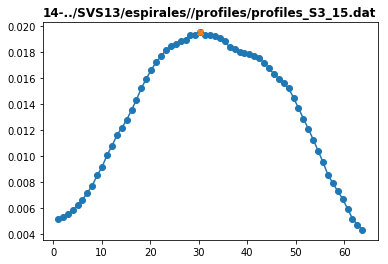

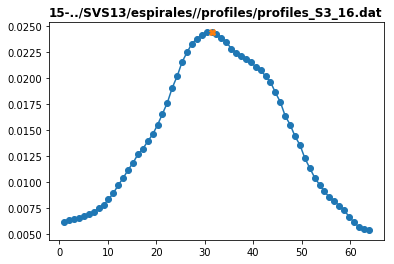

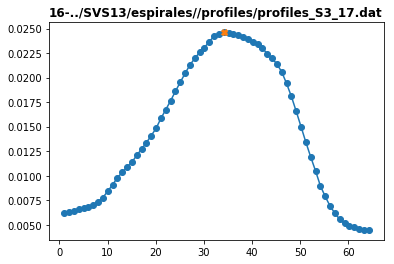

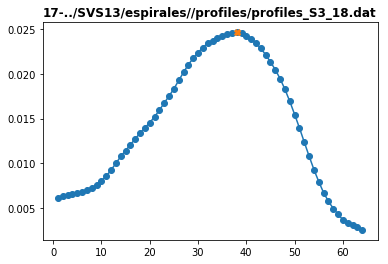

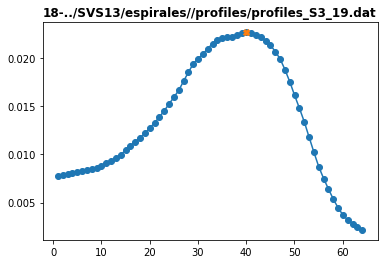

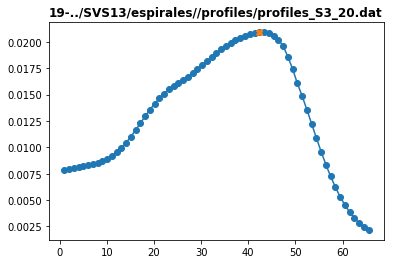

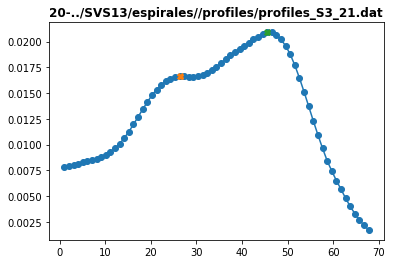

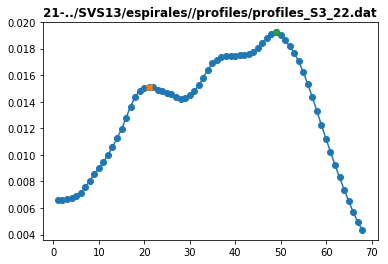

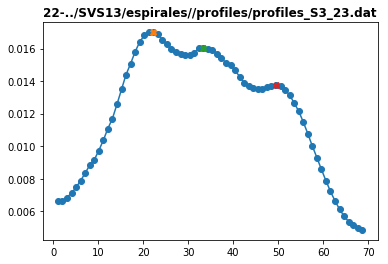

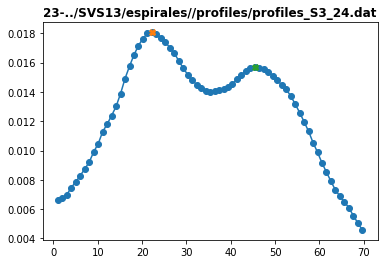

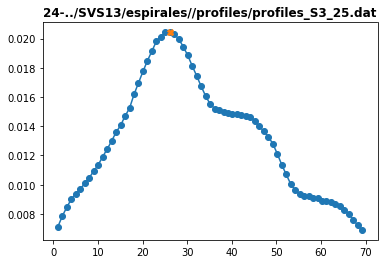

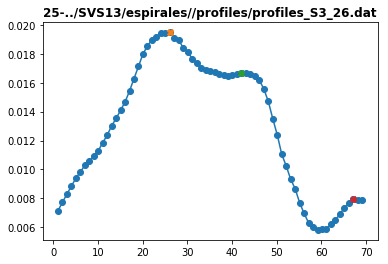

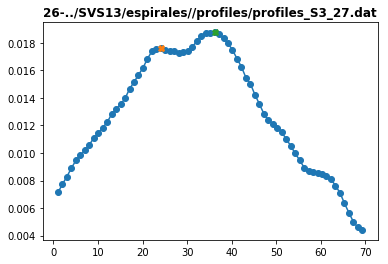

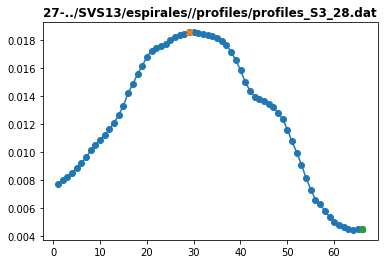

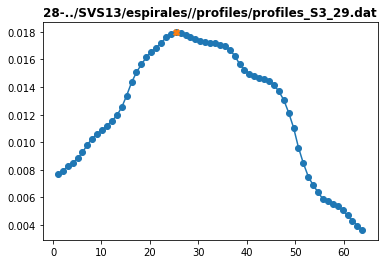

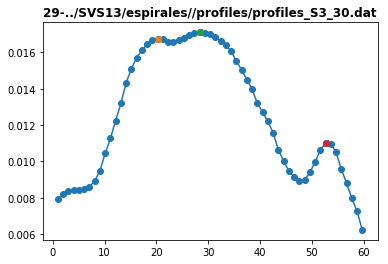

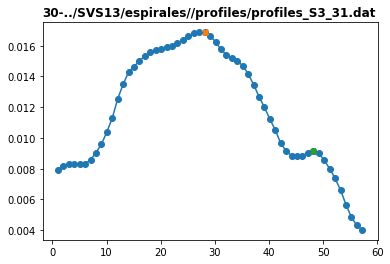

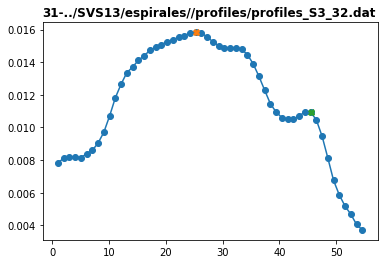

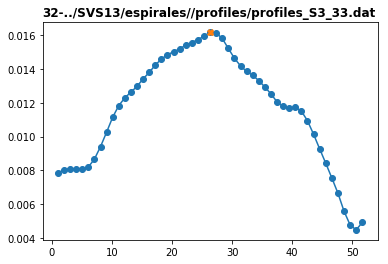

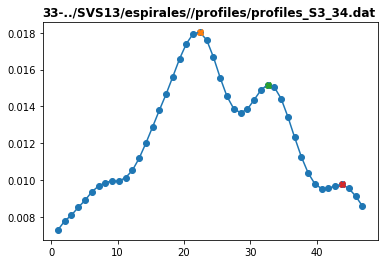

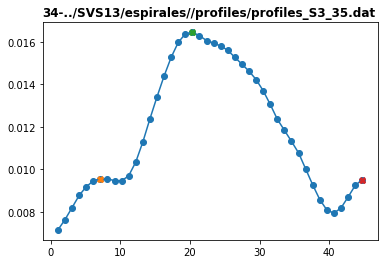

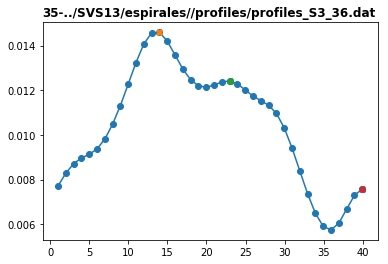

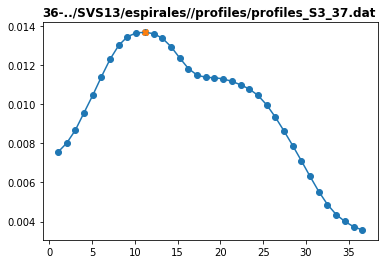

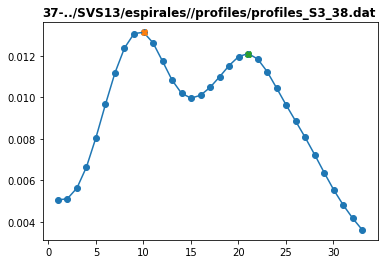

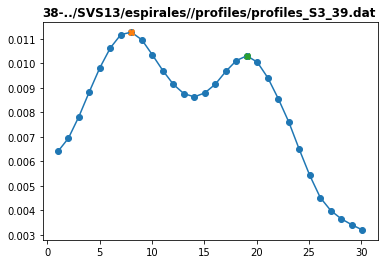

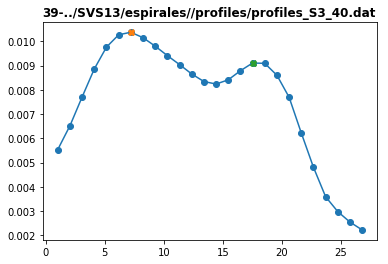

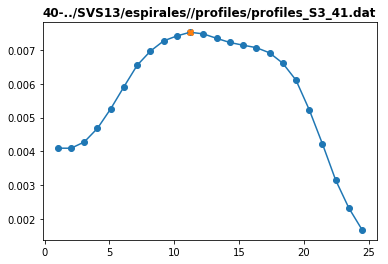

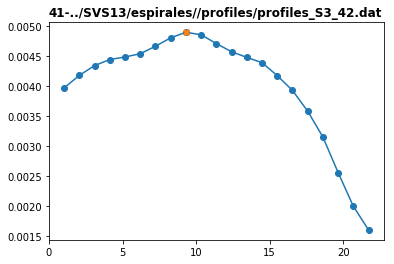

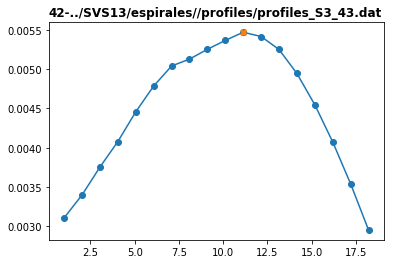

In [60]:
# NO!
def moving_average(l,w=3):
    ''' Calculates de moving average of a list, using a window of size w points. w most be odd.'''
    averaged_list = [0]*(len(l)-(w-1))
    for i, _ in enumerate(l):
        if i == len(l)-w+1:
            break
        averaged_list[i] = np.mean(l[i:i+w])
    return averaged_list

#find maxima in moving average profiles
cut = 1
maxs = []
rms = 1.22e-3 #rms of the map
aver_value = [moving_average(v) for v in value]
aver_dist = [moving_average(d) for d in dist]
for i in aver_value: 
    all_local_max = argrelextrema(np.array(i), np.greater_equal,order=3)[0]
    true_local_max = np.where(np.array(i)[all_local_max]>cut*rms)
    maxs.append(all_local_max[true_local_max])
for i,_ in enumerate(aver_value):
    plt.plot(aver_dist[i], aver_value[i],'o-')
    for j in maxs[i]:
        plt.plot(aver_dist[i][j], aver_value[i][j],'X')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

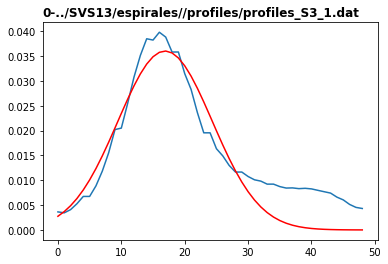

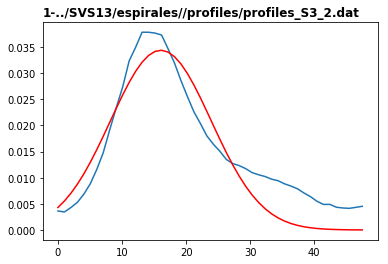

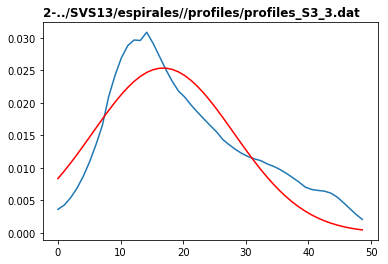

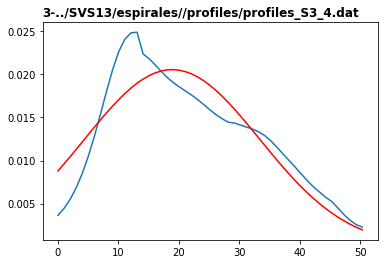

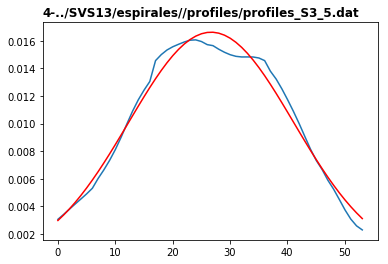

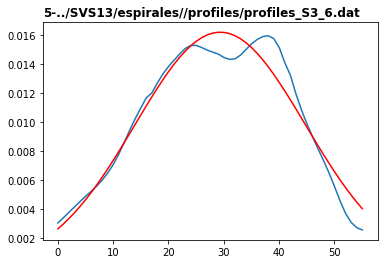

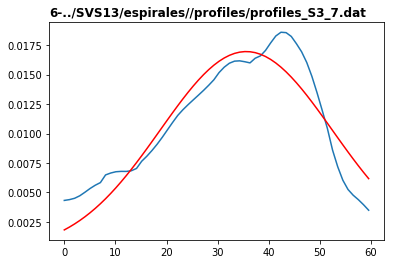

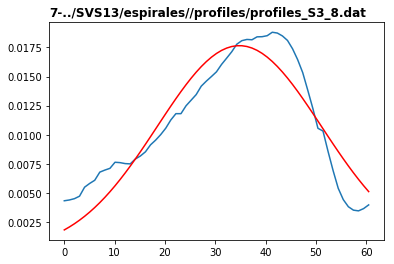

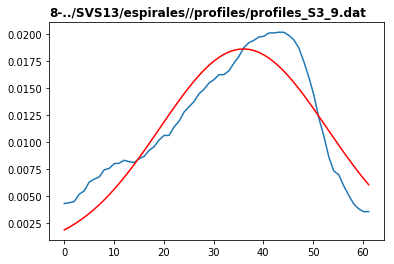

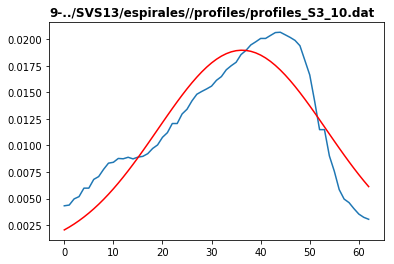

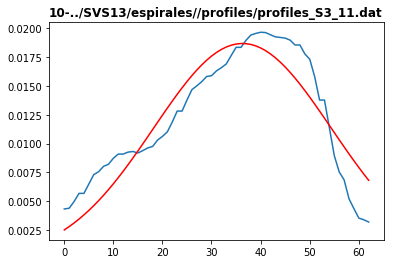

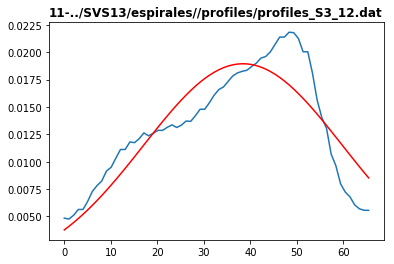

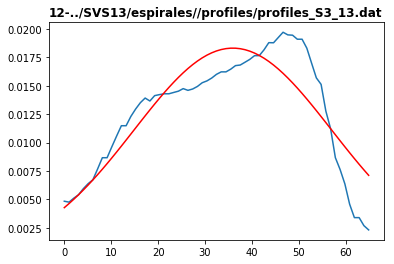

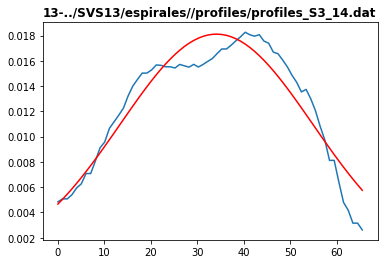

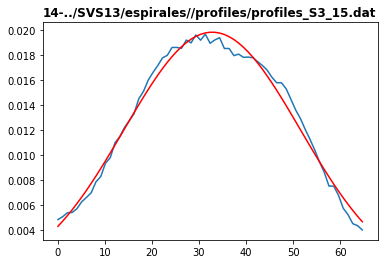

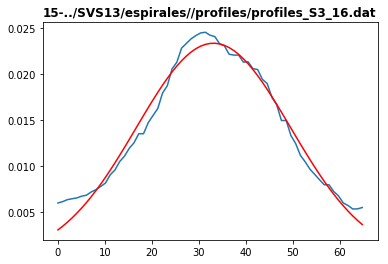

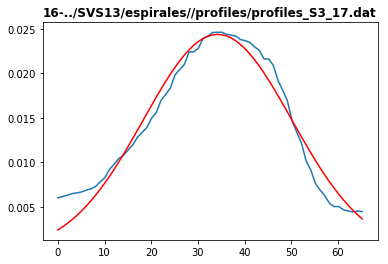

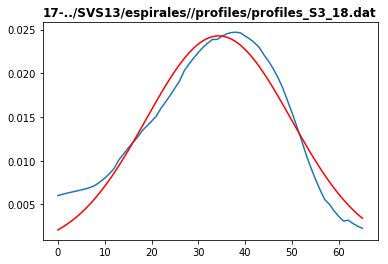

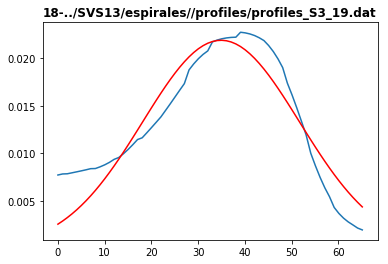

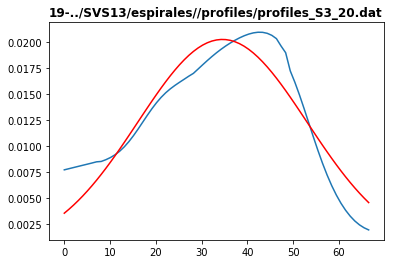

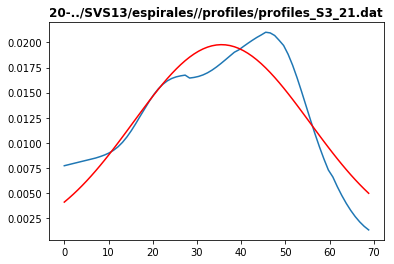

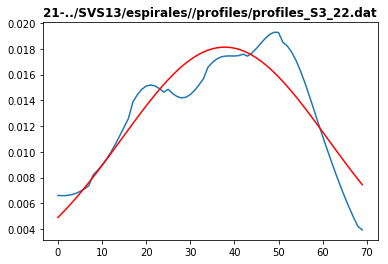

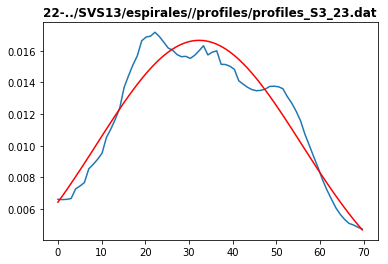

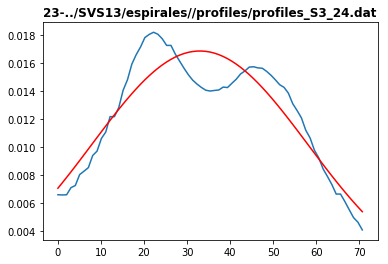

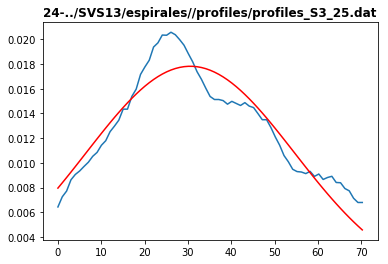

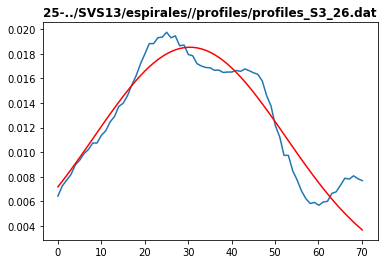

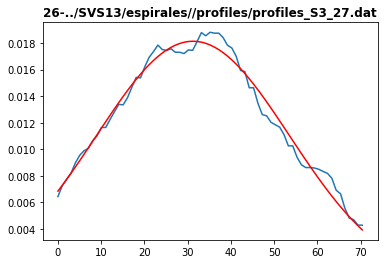

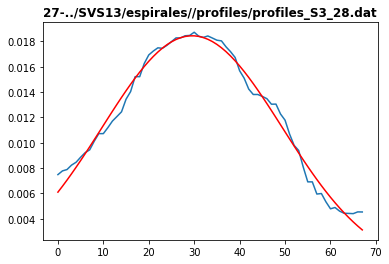

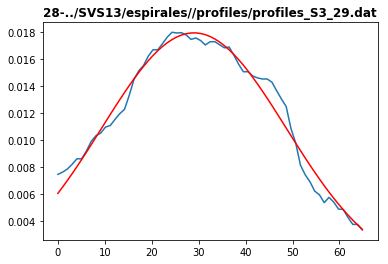

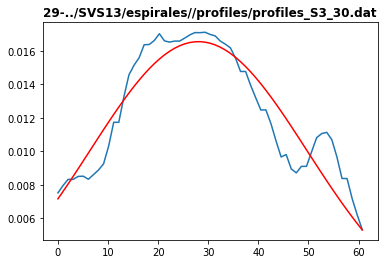

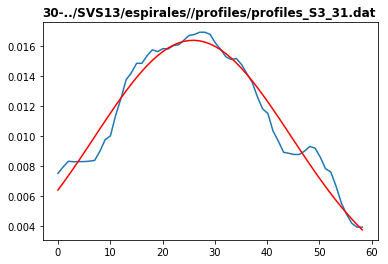

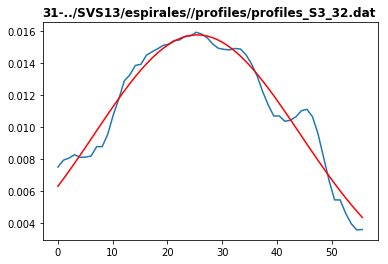

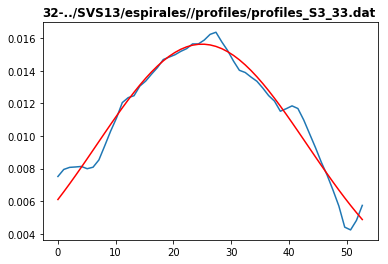

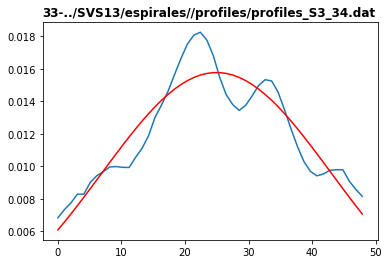

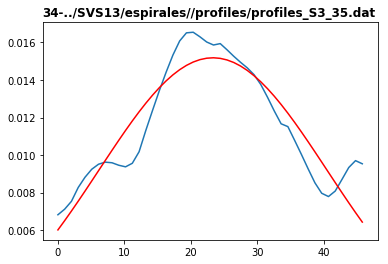

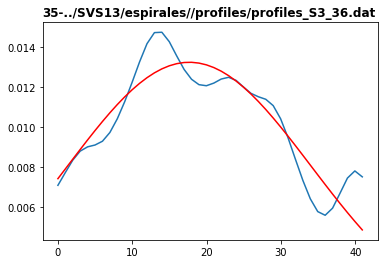

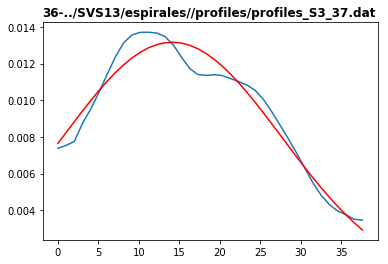

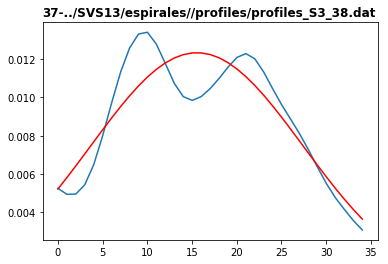

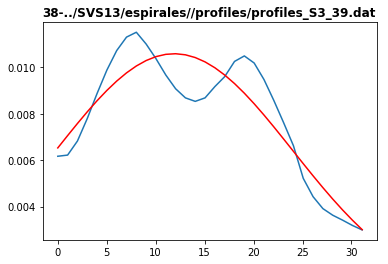

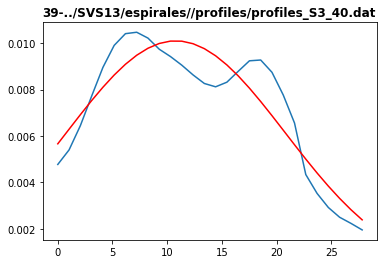

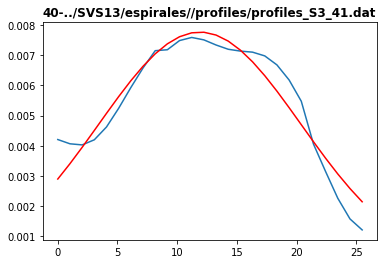

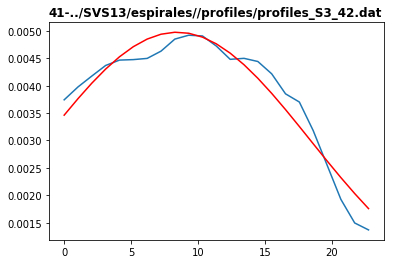

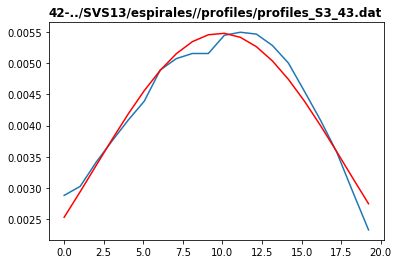

In [5]:
#gaussian fits
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [6]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [7]:
orig_file = directory+'pixels_S3_ini.dat'
end_file = directory+'pixels_S3_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [8]:
outname = 'S3_axis' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [10]:
#save points
cel_size = 0.012 #arcsec, this info is the profiles files
err = [i[0]*cel_size for i in widths]

ang = [posA.position_angle(i).degree for i in c]
r = [posA.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistA-S3.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

#save points
ang = [posB.position_angle(i).degree for i in c]
r = [posB.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistB-S3.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')


##  S3-duda

In [11]:
directory = '../SVS13/espirales/'
file_base = directory+'/profiles/profiles_S3-duda'
file_name = [file_base+'_'+str(i)+'.dat' for i in range(1,14)]
profile = [np.loadtxt(file) for file in file_name]
dist =  [i[:,0] for i in profile]
value = [i[:,1] for i in profile] 

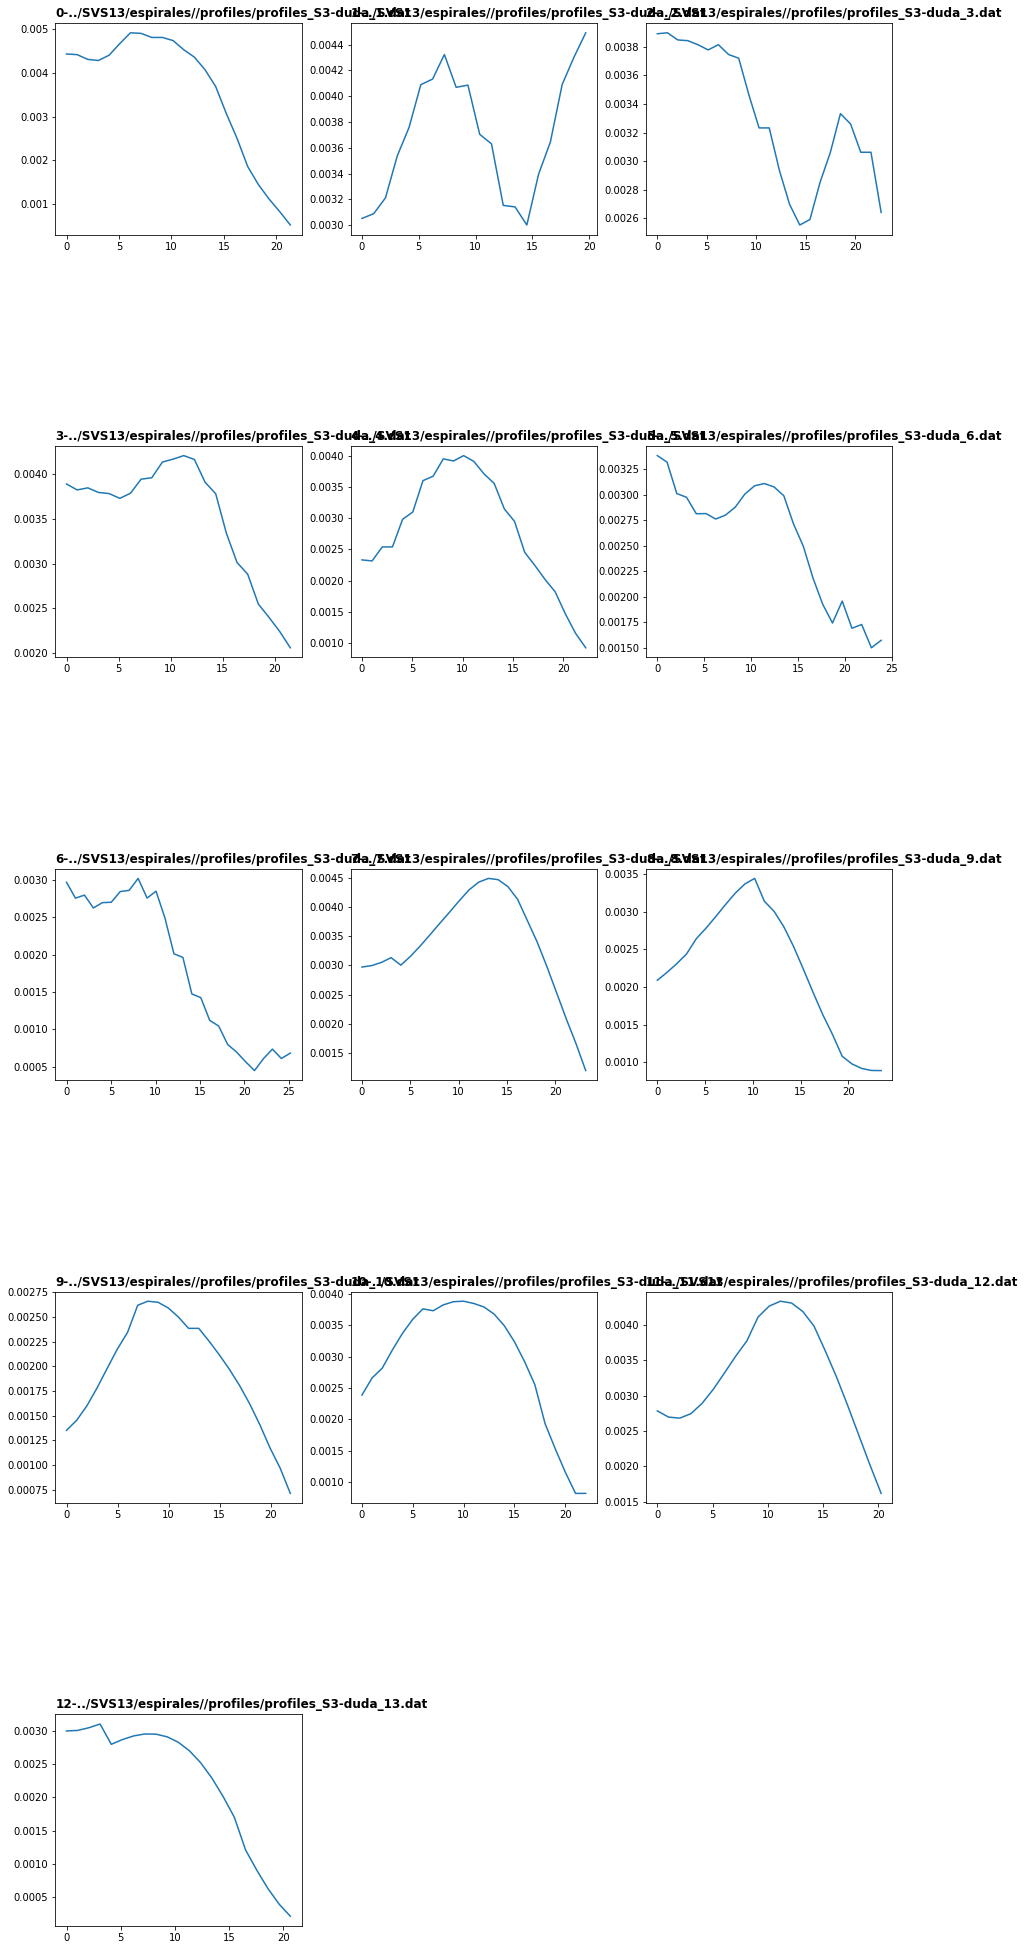

In [12]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_name)):
    # Find the right spot on the plot
    plt.subplot(np.ceil(len(file_name)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(dist[num], value[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_name[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

In [13]:
del value[1:3]
del dist[1:3]
del file_name[1:3]

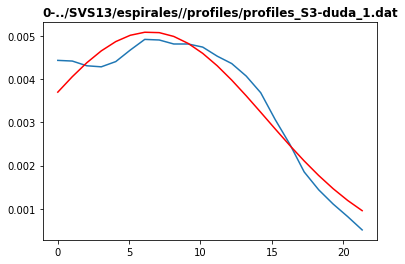

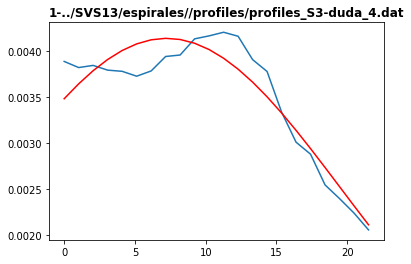

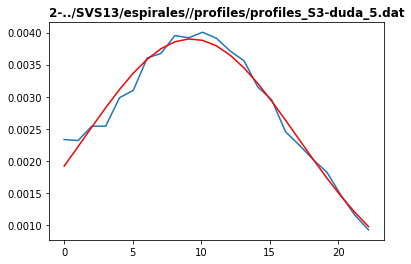

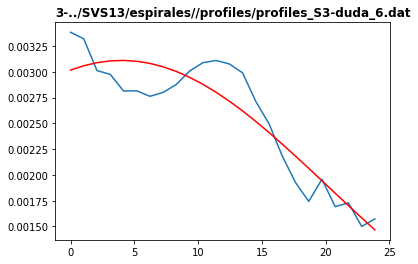

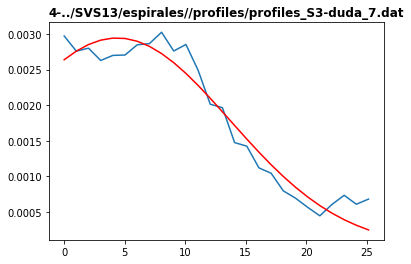

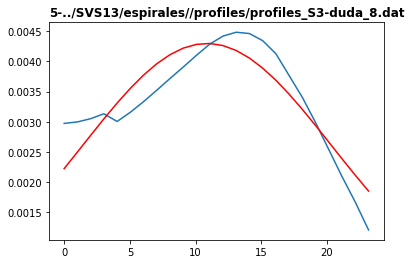

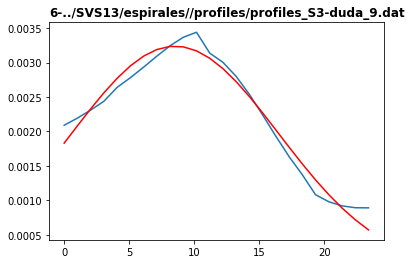

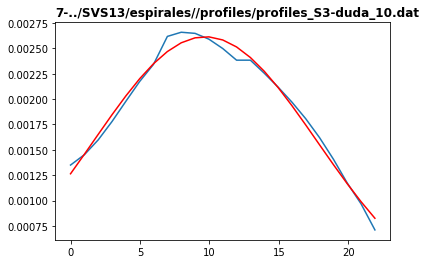

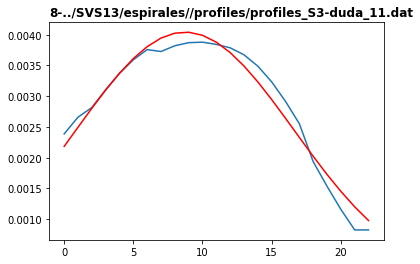

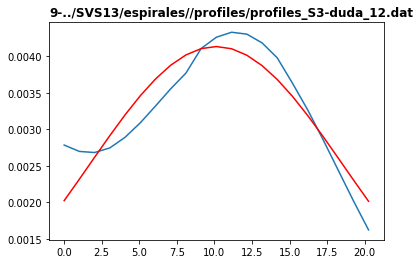

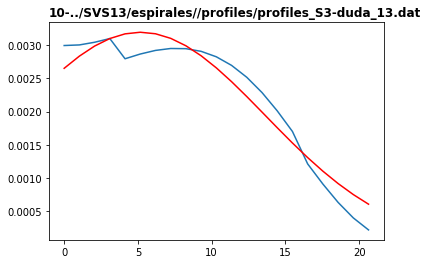

In [14]:
#gaussian fits
centers = []
amplitudes = []
widths = []
for i, d in enumerate(dist):
    popt, pcov = curve_fit(prof.gaussian, dist[i], value[i]) #, maxfev = 10000
    fit = prof.gaussian(dist[i], *popt)
    l = len(popt)
    amplitudes.append([popt[i] for i in range(0,l,3)])
    centers.append([popt[i+1] for i in range(0,l,3)])
    widths.append([popt[i+2] for i in range(0,l,3)])
    plt.plot(dist[i], value[i])
    plt.plot(dist[i], fit , 'r-')
    plt.title(str(i)+'-'+file_name[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [15]:
#are you happy with your fits?
#fits image to work with
fits_name = 'final_normal_r1.5_SVS13.cont.final-1.image-zoom-stars.fits'
hdr, data = wwf.import_fits(directory+fits_name)

In [16]:
orig_file = directory+'pixels_S3_duda_ini.dat'
end_file = directory+'pixels_S3_duda_end.dat'
inis = np.loadtxt(orig_file)
ends = np.loadtxt(end_file)

In [17]:
inis = np.delete(inis, [1,2], axis=0)
ends = np.delete(ends, [1,2], axis=0)

In [18]:
outname = 'S3_axis-duda' 
coords = []
#we want to find the pixels of the maximum points
for i, _ in enumerate(inis):
    x, y = zip(inis[i],ends[i])
    coefficients = np.polyfit(x, y, 1) #line between origin and end
    D = np.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2) #distance from origin to end
    deltaY = y[0]-y[1]
    y0 = [y[0]-deltaY/D*d for d in centers[i]] # y coordinate of maximum points (in pixels)
    x0 = (y0 - coefficients[1])/coefficients[0] # x coordinate of maximum points (in pixels)
    pix = [[x0[i],y0[i]] for i in range(len(x0))]
    #and convert them in sky coords
    coords.append([utils.pixel_to_skycoord(p[0], p[1], WCS(hdr)) for p in pix])
# flatten coords
c = [elem for sublist in coords for elem in sublist]
#save them to crtf
crtf.save_coords(directory+outname,c, color='blue',symbol='o')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

In [19]:
#save points
cel_size = 0.012 #arcsec, this info is the profiles files
err = [i[0]*cel_size for i in widths]

ang = [posA.position_angle(i).degree for i in c]
r = [posA.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistA-S3-duda.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')

#save points
ang = [posB.position_angle(i).degree for i in c]
r = [posB.separation(i).arcsec for i in c]
points = list(zip(ang, r, err))
np.savetxt(directory+'DistB-S3-duda.dat', points, header='PA (deg)\tDistance to A (arcsec)\tError(arcsec)')